# Data Series

A data series is an ordered collection, often with respect to time.

Examples:
- Temperatures throughout the year
- Height/weight throughout a lifetime
- Stock prices across time
- Physiological signals (EEG, ECG, pulse rate, ...)
- Sound or video


<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/life_expectancy_time_series.png?raw=true">

If order is important, then what you have is a time series
- Doesn’t actually have to be throughout time!



# Time Series Data Analysis

Let's look at Google trends data of keywords 'diet' and 'finance' to see how they vary over time. Could there be more searches for these terms in January when we're all trying to turn over a new leaf? 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

Now let's import the data and see what's in it:

In [7]:
url = 'https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week2/multiTimeline.csv'

df = pd.read_csv(url,  skiprows=1)
df.head()
df

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
...,...,...,...,...
163,2017-08,46,52,43
164,2017-09,44,50,47
165,2017-10,44,47,45
166,2017-11,41,47,47


Use the .info() method to check out your data types, number of rows and more:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [9]:
#Turn the 'month' column into a datetime data type and make it the index of the DataFrame
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [10]:
df.head(20)

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43
2004-06-01,64,24,45
2004-07-01,60,23,44
2004-08-01,59,28,44
2004-09-01,53,25,44


Now let's use the pandas [built-in visualization method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) to plot your data as 3 line plots on a single figure (one for each column).

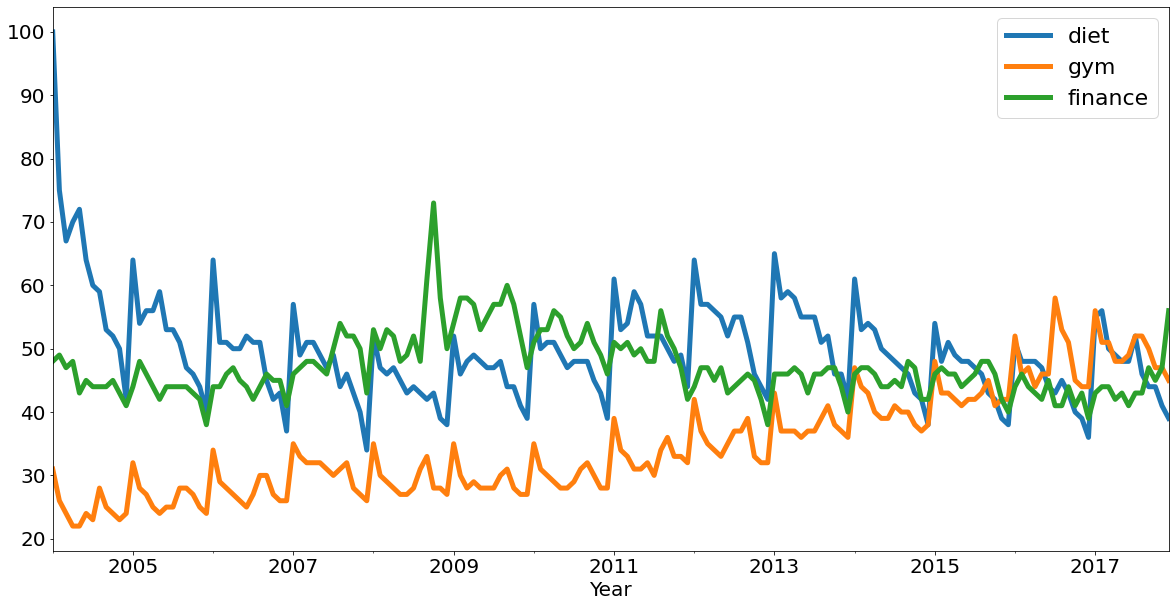

In [11]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Now let's Plot the 'diet' column by itself as a time series.

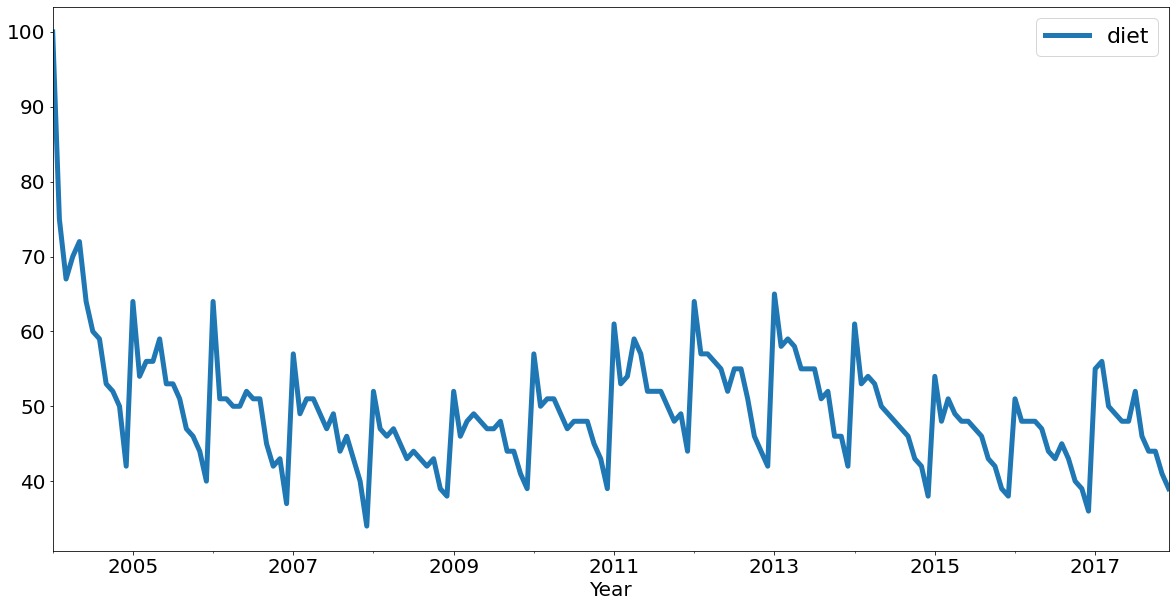

In [12]:
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

 It looks like there are trends and seasonal components to these time series!

## Identifying Trends

One popular way of identifying (long-term) trends is to taking a rolling average (also known as a moving average). This means that, for each time point, we take the average of the points on either side of it (the number of points is specified by a window size, which you need to choose).

Let's plot the rolling average of 'diet' and 'gym' using [built-in pandas methods](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html). Which window size do you think we should use? It is crucial for the moving window to be the exact size of the seasonality (which can be determined using Fourier Transforms), but we can approximate here. 

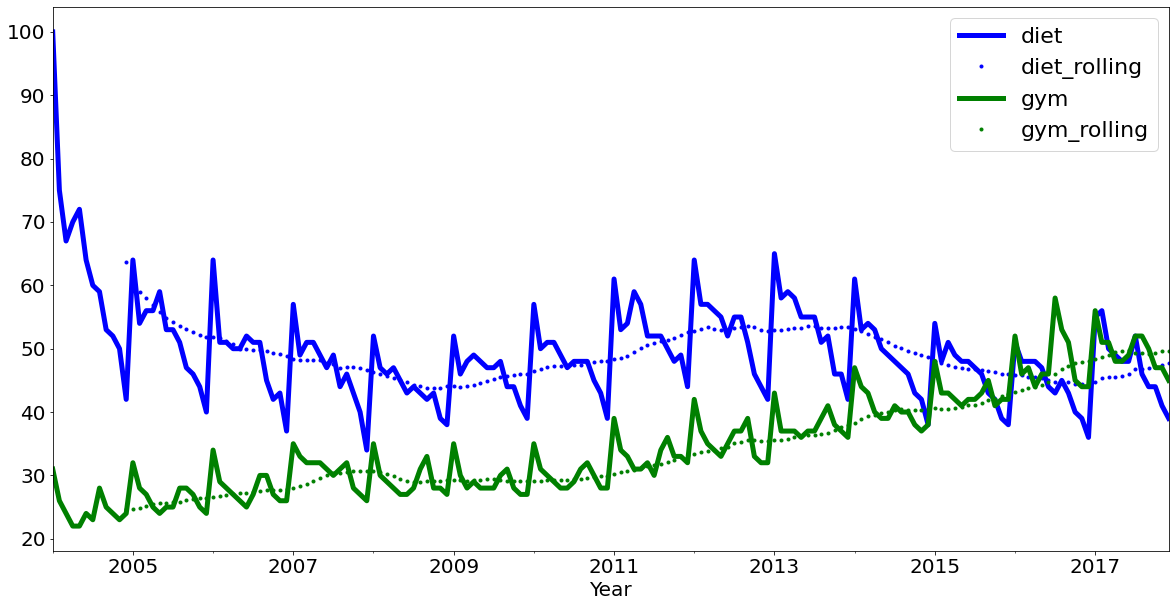

In [13]:
diet = df[['diet']]
gym = df[['gym']]
window = 12


df_rm = pd.concat([diet, diet.rolling(window).mean(), gym, gym.rolling(window).mean()], axis=1)
ax = df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20, style= ['b', 'b.', 'g', 'g.'])
ax.legend(['diet', 'diet_rolling', 'gym', 'gym_rolling'])
plt.xlabel('Year', fontsize=20);

###  Seasonal Patterns

You can remove the trend from a time series to investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over. Another way to remove the trend is called __differencing__, where you look at the difference between successive data points (called first-order differencing).

For example, let's use pandas to compute and plot the [first order difference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html) of the 'diet' series

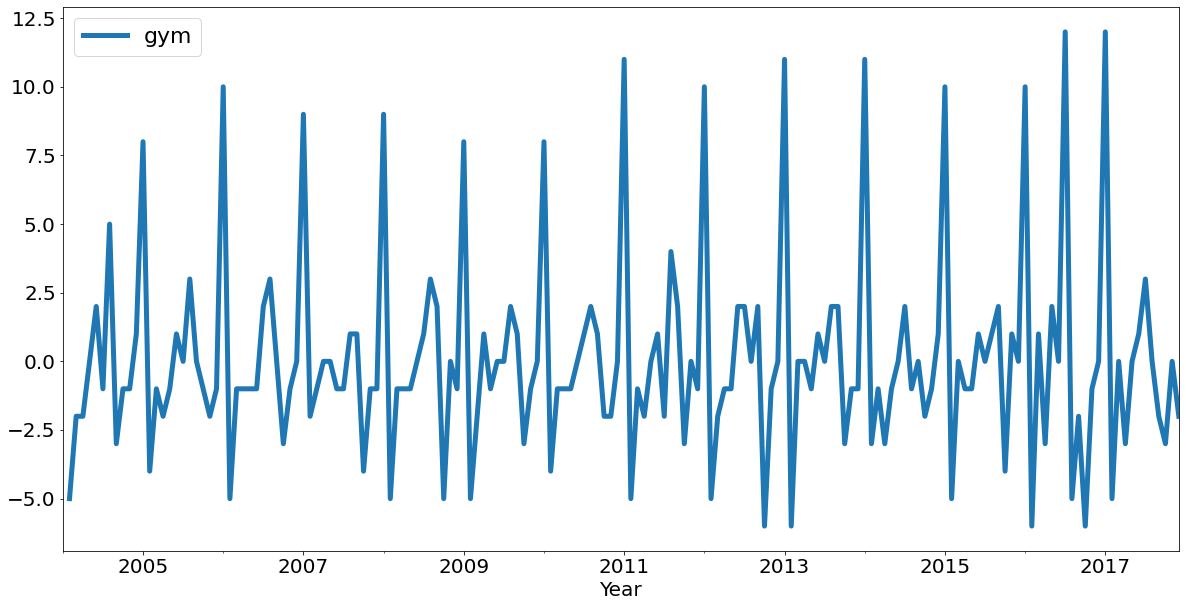

In [14]:
gym.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

See that you have removed much of the trend and you can really see the peaks that occur twice a year.  What does this mean? You can unmute yourselves or type your answer in the discussion chat!



---



With more signal processing, it is possible to separate slower trends in time-series data from more frequent recurring trends (think "seasonal" events). To do this, it is important to be able to separate components of a signal based on how quickly they change.

By way of illustration, we can use the statsmodels.tsa python module to separate the above Google trends data into 3 components:

1.   Slow-moving trend
2.   Higher-frequency repeating structure
3.   Residual - aspects of the signal not explained by either 1 or 2

This is only possible by considering a signal as a summation of differently changing components.

Reference on statsmodels.tsa module: https://devdocs.io/statsmodels/generated/statsmodels.tsa.seasonal.seasonal_decompose . The Additive Model is utilized when variations around the trend do not change with the level of the time series, which is true in this dataset)

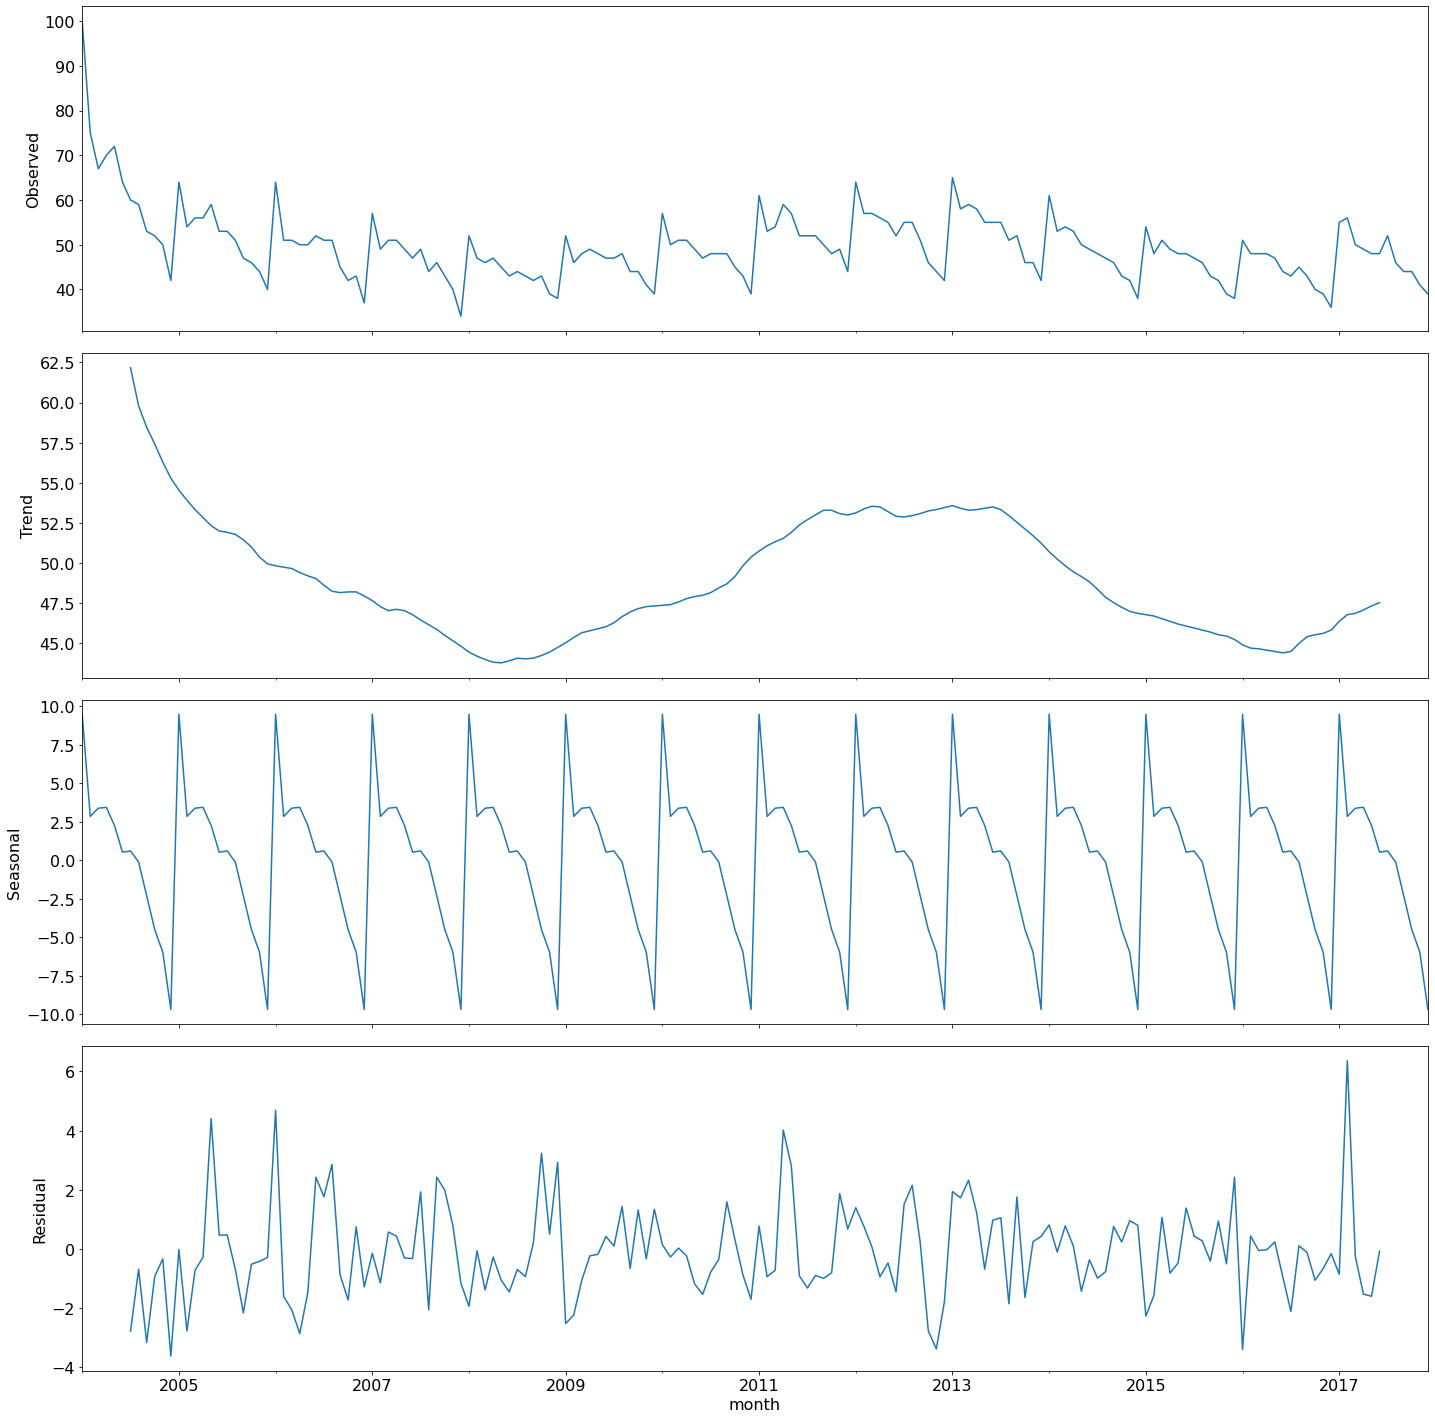

In [22]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(diet, model = "additive")
matplotlib.rcParams['figure.figsize'] = [20.0, 20.0]
fig = decomp.plot()

The formula for the additive model is Y[t] = S[t] + T[t] + e[t], where S, T, and e refer to the Seasonality, Trend, and Error (think White Noise) in the time series, respectively.

## Periodicity and Autocorrelation


A time series is *periodic* if it repeats itself at equally spaced intervals, say, every 12 months. Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that. Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation. We'll get to this in a minute. First, let's remind ourselves about correlation:

### Correlation

The correlation coefficient of two variables captures how linearly related they are.

Let's compute the [correlation coefficients](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) of all of these time series and interpret the results.

In [16]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


The correlation coefficient of 1.0 corresponds to the fact that the series is perfectly correlated with itself. The rest of the correlation coefficients are pretty weak except for negative correlation between 'gym' and 'finance', which indicates that an increase in 'gym' tends to correspond to decrease in 'finance'.  Does this make sense?

Now let's plot the first-order differences of these time series and then compute the correlation coefficients. Removing the trend may reveal correlation in seasonality. Interpret the results.

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


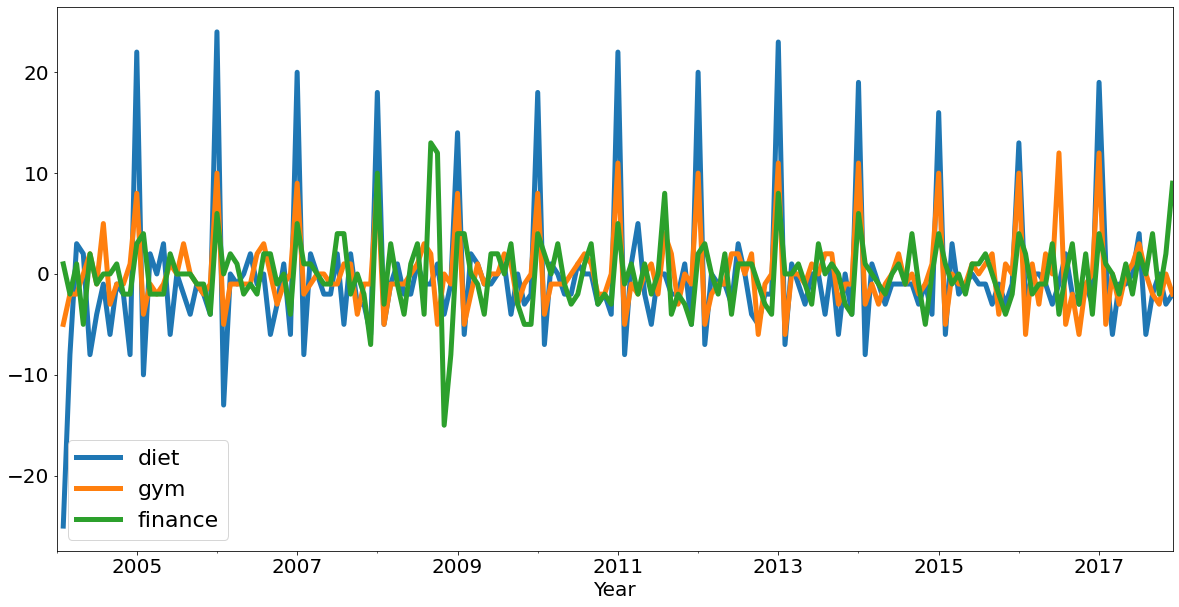

In [17]:
#Solution
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
df.diff().corr()

#### Answer

The seasonality of 'gym' and 'diet' are strongly correlated. The seasonality of 'finance' and 'diet" as well as 'finance' and 'gym' are also correlated.

###  Autocorrelation

Let's now plot the autocorrelation of the 'diet' series: on the x-axis you have the lag and on the y-axis you have how correlated the time series is with itself at that lag. For example, if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

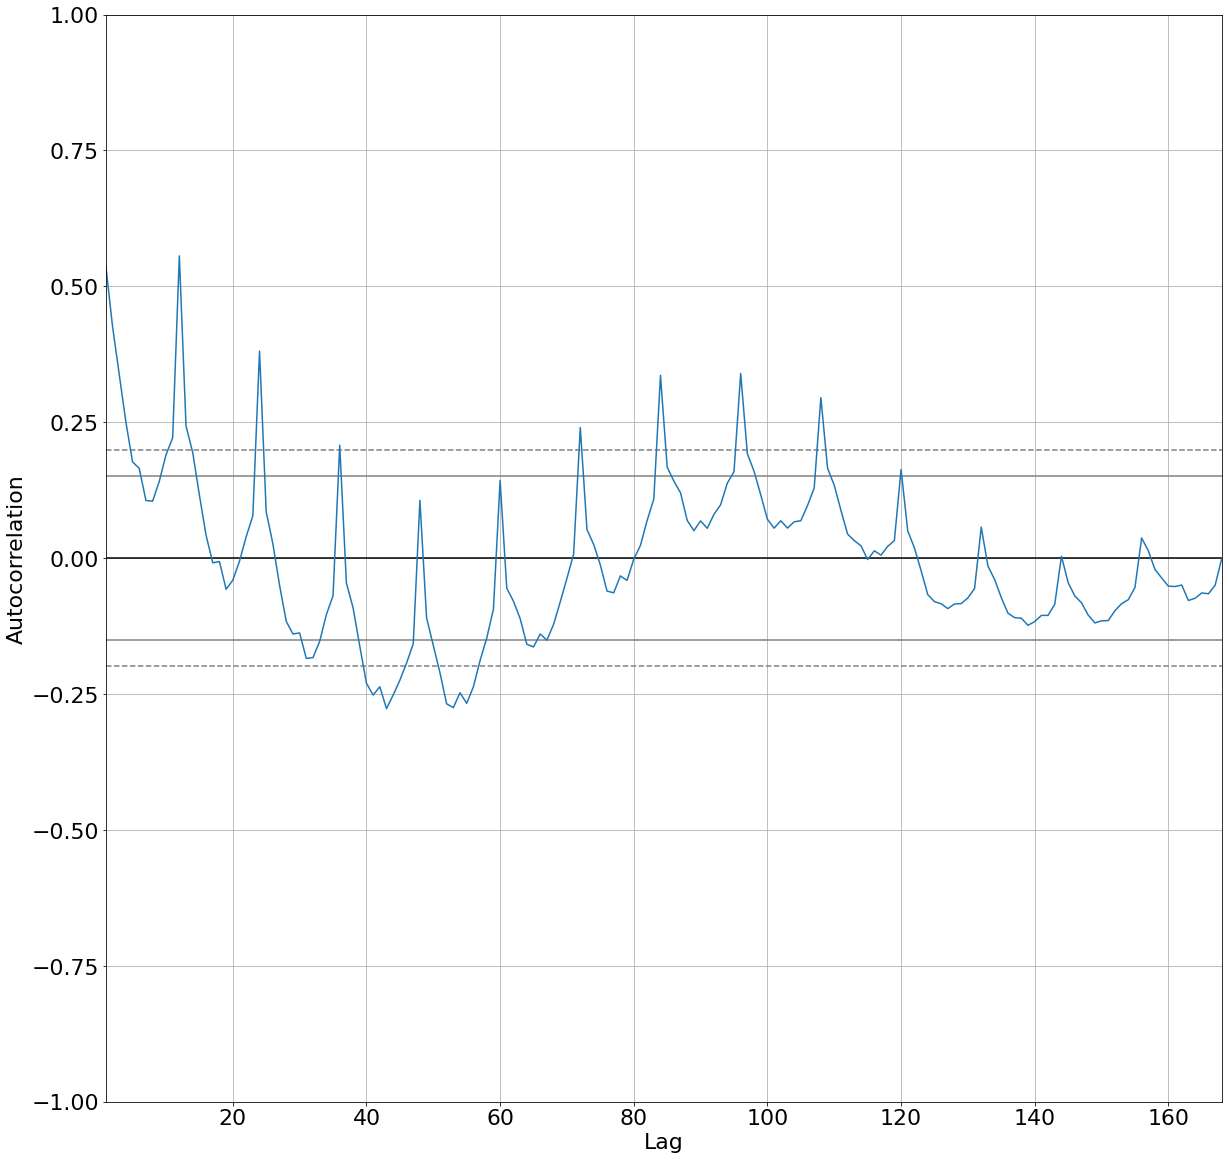

In [18]:
pd.plotting.autocorrelation_plot(diet);



---
# Representing Signals Data

There are multiple ways to represent time series signals data.
- Some are good, some are bad, some are convenient

We will look at signals data in the:
1. Time Domain
2. Frequency Domain
3. Time/Frequency Domain




# The Time Domain 

Visualizing a signal in the time domain is often most intuitive at first, and gives some indication of signal strength (e.g., volumne) and duration.  The plot below shows an audio signal in the time domain.  In this section we will learn how to build a complex signal, and then later we'll learn how to decompose it!

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/raw/master/Images/Week2/sound_time_series.png?raw=true">



### Sinusoids: the basic building block of time series

Sinusoids are special
- Simplest waveform – a single frequency

A sinusoid is represented by the equation:

&emsp;&emsp;$y(t) = a(t) sin (2\pi ft+\phi) = a(t) sin (\omega t+\phi)$ 

where:

* $a(t) = $ amplitude
* $f = $ ordinary frequency, or number of oscillations that occur each second of time (Hz)
* $\omega = 2\pi f$, the angular frequency (radians per second)
* $\phi =$ phase
     
Its simplicity makes sinusoids excellent building blocks for many time series.

Let's look at an example.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io.wavfile
from IPython.display import Audio

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

(-1.0, 1.0)

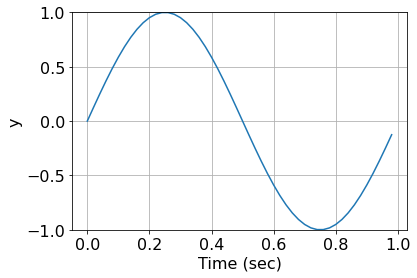

In [20]:
n_sec = 1                         # number of seconds to plot
n_points = 50                     # number of points per second

a = 1                             # amplitude
f = 1                             # one oscillation per second
omega = 2*np.pi*f                 # angular frequency
phi = 0                           # phase

t = np.arange(n_sec*n_points)/n_points    # time axis
y = a*np.sin(omega*t + phi)       # sinusoid

# PLOT
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.grid()
plt.ylim([-1,1])

We can combine multiple sinusoids to create more complex signals.

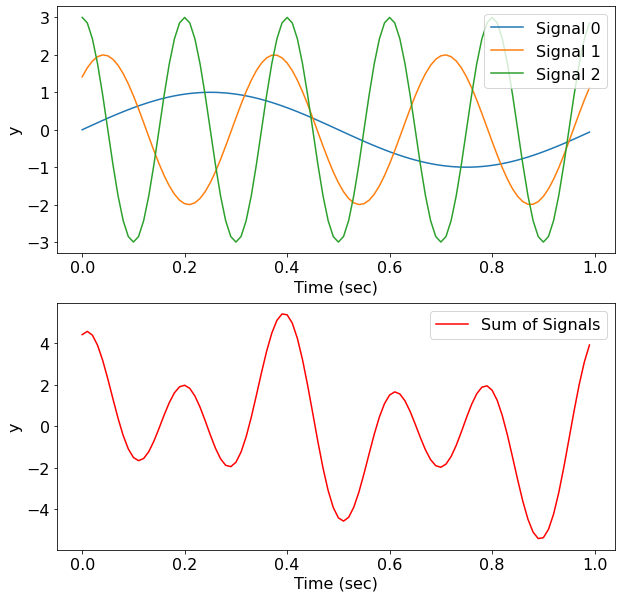

In [21]:
n_sec = 1                         # number of seconds to plot
n_points = 100                    # number of points per second
t = np.arange(n_sec*n_points)/n_points    # time 


# Let's combine three sinusoids
n_signals = 3
y_sum = np.zeros((len(t),))
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
for s in range(n_signals):
    a = s+1                  # amplitude
    f = 2*s+1                # oscillations per second
    omega = 2*np.pi*f        # angular frequency
    phi = np.pi/4*s          # phase
    
    y= a*np.sin(omega*t + phi)
    y_sum += y
    
    plt.plot(t,y,label='Signal {}'.format(s))
    
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.legend()

# Plot the sum of the signals
plt.subplot(2,1,2)
plt.plot(t,y_sum,'r',label='Sum of Signals')
plt.xlabel('Time (sec)')
plt.ylabel('y')
plt.legend()

# Frequency Domain Representation

Another useful representation is the frequency domain
- Provides an alternative representation
- Is very mathematically convenient!

Time series can be decomposed in terms of sinusoidal building blocks called the *spectrum*.


<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/sound_frequencies.png?raw=true">

In a subsequent lesson we will learn how to use the [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform) to decompose time series data into its frequency spectrum.

There is no temporal information in the spectrum, only frequencies
- Not that great of a representation for dynamically changing sounds (e.g., speech and music)
- Can display some information about the energy and the length of the signal, but not what it sounds like!

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/sound_time_series_2.png?raw=true">




# Time/Frequency Representation

Many names/varieties
- Spectrogram, sonogram, periodogram, ...

A time-ordered sequence of frequency compositions
- Can help show how things change in both time and frequency

Most useful representation so far!
- Reveals information about both the time and frequency content without loss

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/sound_time_plus_frequencies.png?raw=true">

###  A Real Example

Time domain
- We see the events
- What do they sound like though?

Frequency domain
- We see bass and mids
- Where are they though?

Spectrogram
- We "see" all the sounds
- And have a sense of how they sound!

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/sound_real_example.png?raw=true">

We will work more in the frequency and time/frequency domains later, but for now just be aware that they exist (and are useful)!

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/doge.jpg?raw=true" alt="doge" style="width:200px;height:200px;">
